# Huffman Compression Algorithm

### By Todor Nedkovski

### Table of contents

This notebook includes a brief explanation about Huffman Compression Algorithm works.

We are going to talk about a couple of questions:

1. What is the difference betwenn lossless and lossy compression?
2. How are Huffman trees constructed?
3. How can we get back the uncompressed data from the Huffman tree?
4. Comparison with other lossless compression algorithms.

In the end we are going to overview what we have just learned and think of other problems we might encounter while compressing files. 

## Abstract

In the early days computers (around 1980s) did not have much more then a 10 MB storage capacity. It's really mind blowing that you have ten thousand times as much now in your phone then you did back then. The problem is that the files we want to store seem to keep pace with that growth. How can we store more data with less space? The answear is compression! (I don't expext you to be surprised). There are a lot of compression algorithms but we are going to talk about a specific one. 

## What is the difference bewtween Fixed and Variable length code

### What is a Fixed Length code 

In a fixed-length code each codeword has the same number of bits

### What is Variable-Length code

In coding theory a variable-length code is a code which maps source symbols to a variable number of bits. There are 3 sub-types of the variable-length code

### Non-singular

A code is non-singular if each source symbol is mapped to a different non-empty bit string, i.e. the mapping from source symbols to bit strings is injective.

1. For example, the mapping $M_{1}=\{\,a\mapsto 0,b\mapsto 0,c\mapsto 1\,\}$ is not non-singular because both "a" and "b" map to the same bit string "0" ; any extension of this mapping will generate a lossy coding. Such singular coding may still be useful when some loss of information is acceptable.
2. However, the mapping $M_{2}=\{\,a\mapsto 1,b\mapsto 011,c\mapsto 01110,d\mapsto 1110,e\mapsto 10011,f\mapsto 0\}$ is non-singular ; its extension will generate a lossless coding, which will be useful for general data transmission. Note that it is not necessary for the non-singular code to be more compact than the source.

### Uniquely decodable

A code is **uniquely decodable** if its extension is non-singular (see above). Whether a given code is uniquely decodable can be decided with the Sardinas–Patterson algorithm.

1. The mapping $M_{3}=\{\,a\mapsto 0,b\mapsto 01,c\mapsto 011\,\}$ is uniquely decodable . 
2. Consider again the code $M_{2}$ from the previous section. This code is not uniquely decodable, since the string 011101110011 can be interpreted as the sequence of codewords 01110 – 1110 – 011, but also as the sequence of codewords 011 – 1 – 011 – 10011. Two possible decodings of this encoded string are thus given by cdb and babe. However, such a code is useful when the set of all possible source symbols is completely known and finite, or when there are restrictions (for example a formal syntax) that determine if source elements of this extension are acceptable. Such restrictions permit the decoding of the original message by checking which of the possible source symbols mapped to the same symbol are valid under those restrictions.

### Prefix

A prefix code is a type of code system distinguished by its possession of the "prefix property", which requires that there is no whole code word in the system that is a prefix (initial segment) of any other code word in the system.

A code is a prefix code if no target bit string in the mapping is a prefix of the target bit string of a different source symbol in the same mapping. This means that symbols can be decoded instantaneously after their entire codeword is received. Other commonly used names for this concept are prefix-free code, instantaneous code, or context-free code.

The example mapping ${\displaystyle M_{3}}$ in the previous paragraph is not a prefix code because we don't know after reading the bit string "0" if it encodes an "a" source symbol, or if it is the prefix of the encodings of the "b" or "c" symbols.
An example of a prefix code is shown below.

$M_4 = \{\,a\mapsto 0,b\mapsto 10,c\mapsto 111\,\}$

Example of encoding and decoding:
aabacdab → 00100110111010 → |0|0|10|0|110|111|0|10| → aabacdab

## What is the difference betwenn lossless and lossy compression?

### What is lossless compression?

The Lossy compression method eliminates some amount of data that is not noticeable.
This technique **does not** allow a file to restore in its original form but significantly reduces the size.
The lossy compression technique is beneficial if the quality of the data is not your priority.
It slightly degrades the quality of the file or data but is convenient when one wants to send or store the data.
This type of data compression is used for organic data like audio signals and images.

### What is lossy compression?

The Lossless compression method is capable of reconstituting the original form of the data.
The quality of the data is not compromised.
This technique allows a file to restore its original form.
Lossless compression can be applied to any file format can improve the performance of the compression ratio.

## When can we get away with lossy compression?

As the definition above states lossy compression eliminates the data that is not noticeable.
This is said because for the most part we use lossy compression for images, videos and audio files.
Most of the information is still there and you would not notice a few milliseconds missing from the video or a couple of pixels missing from the image.
Basically everything without text. Unless you are into guessing missing chars from words I guess it is fine.

## What is Huffman Compression Algorithm?

Huffman Compression Algorithm is a prefix loseless type of compression algorithm developed by David A. Huffman (student at MIT), and published in the 1952 paper. I guess you can say it is old. The main idea is to use smaller sequences of bits for more frequent charecters. 

To begin generating the Huffman tree, each character gets a weight equal to the number of times it
occurs in the file. For example, in the "happy hip hop" example, the character 'p' has weight 4,
'h' has weight 3, the space has weight 2, and the other characters have weight 1. Our first task is to
calculate these weights.

1. Create a collection of singleton trees, one for each character, with weight equal to the character
frequency.
2. From the collection, pick out the two trees with the smallest weights and remove them.
Combine them into a new tree whose root has a weight equal to the sum of the weights of the
two trees and with the two trees as its left and right subtrees.
3. Add the new combined tree back into the collection.
4. Repeat steps 2 and 3 until there is only one tree left.
5. The remaining node is the root of the optimal encoding tree. 

<img src="imgs\first.png" style="width: 400px;">

We start by choosing the two smallest nodes. There are four nodes with the minimal weight of one, it
doesn't matter which two we pick. We choose 'o' and 'y' and combine them into a new tree whose
root is the sum of the weights chosen. We replace those two nodes with the combined tree. The nodes
remaining in the collection are shown in the light gray box at each stage.

<img src="imgs\second.png" style="width: 400px;"/>

Now we repeat that step, this time there is no choice for the minimal nodes, it must be 'a' and 'i'.
We take those out and combine them into a weight 2 tree. Note how the collection of nodes shrinks by
one each iteration (we remove two nodes and add a new one back in).

<img src="imgs\third.png" style="width: 400px;"> 

Again, we pull out the two smallest nodes and build a tree of weight 4:

<img src="imgs\fourth.png" style="width: 400px;"> 

One more iteration combines the weight 3 and 2 trees into a combined tree of weight 5:

<img src="imgs\fifth.png" style="width: 400px;"> 

Combining the two 4s gets a tree of weight 8:

<img src="imgs\sixth.png" style="width: 400px;"> 

And finally, we combine the last two to get our final tree. The root node of the final tree will always
have a weight equal to the number of characters in the input file.

<img src="imgs\seventh.png" style="width: 400px;"> 

Remember that it is essential that you use the same tree to do both encoding and decoding of your files.
Since each Huffman tree creates a unique encoding of a particular file, you need to ensure that your
decoding algorithm generates the exact same tree, so that you can get back the file.

### The Pseudo-EOF

You can now see that our three has asymmetrical form (jagged tree). We have not talked about this but trees usually should not be like this. What happens when we try to store a Huffman-encoded sequence on-disk in a file? Each file on your computer is typically stored as a number of bytes (groups of eight bits). Therefore if you try to write a Huffman-encoded string of bits into a file and you don't have exactly multiple of eight bits then your operating system would add random bits at the end. 

For example the word "ahoy" with the huffman tree above translated would look something like this 

<center><b>1101001100111</b></center>

Those are excatly thirheen bits which means that 3 more will be added. Let's say that those 3 bits will be **111**

In that case, the bit sequence would be written to disk as

<center><b>1101001100111111</b></center>

If we were to then load this back from disk and decode it into a sequence of characters, we would get "ahoyi". Even worse if those random bits are not in out tree (in that case "000") we would get an error.

This is clearly a problem. We need a special charcter which tells us where our compressed data ends. It won't be seen and we can add it to our tree in the same way we have added all the other characters. Here is a possible tree with ■

<img src="imgs\eight.png" style="width: 400px;">

If we encode "happy hip hop■" we get the following bitstring

<center><b>1011000000111010</b></center>

| Character | Frequency |
|-----------|-----------|
| h         | 1         |
| e         | 1         |
| l         | 2         |
| o         | 1         |
| ■         | 1         |

This ■ is called *pseudo end of file* or *Pseudo-EOF* for short.

Let's implement it with python

We start with our imports

```python
from io import BytesIO

```

Now we will create our Node tree class

```python
class NodeTree(object):

    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

    def nodes(self):
        return (self.left, self.right)

    def __str__(self):
        return '%s_%s' % (self.left, self.right)
```

We need to calculate character's frequences.

```python
freq = {}

for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1
```

After that we need to sort them in ascending order

```python
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
```

Now we need to create the function that merges our nodes  

```python
nodes = freq

while len(nodes) > 1:
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
```

Finally we need to add the nodes to the dictionary

```python
def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d
```

All combined it should look something like this

In [5]:
from io import BytesIO

def huffman(string):
    # Creating tree nodes
    class NodeTree(object):

        def __init__(self, left=None, right=None):
            self.left = left
            self.right = right

        def children(self):
            return (self.left, self.right)

        def nodes(self):
            return (self.left, self.right)

        def __str__(self):
            return '%s_%s' % (self.left, self.right)


    # Main function implementing huffman coding
    def huffman_code_tree(node, left=True, binString=''):
        if type(node) is str:
            return {node: binString}
        (l, r) = node.children()
        d = dict()
        d.update(huffman_code_tree(l, True, binString + '0'))
        d.update(huffman_code_tree(r, False, binString + '1'))
        return d


    # Calculating frequency
    freq = {}
    for c in string:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1

    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

    nodes = freq

    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))

        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)

    huffmanCode = huffman_code_tree(nodes[0][0])
        
    return (huffmanCode, freq)

It's also good to have a function to print it

In [6]:
def print_huffman(huffmanCode, freq):
    print(' Char | Huffman code ')
    print('----------------------')
    for (char, frequency) in freq:
        print(' %-4r |%12s' % (char, huffmanCode[char]))

Let's implement data reading function in advance because we are going to use it a lot later on.

In [20]:
def get_data(file):
    data = open("data/" + file + ".txt")
    text = data.readlines()
    return text[0]

Now we need a function to count the number of bits in a specific code tree

In [7]:
def calculate_bits(code, freq):
    bits = 0
    for (char, count) in freq:
        bits += len(code[char]) * count
    return bits

We can calculate how much data we can compress with that particular code tree

In [19]:
(code, freq) = huffman(text[0])

after_compression = calculate_bits(code, freq)

before_compression = sum([len(format(ord(x), 'b')) for x in text[0]])

percentage = (after_compression / before_compression) * 100

print("%.2f" % percentage + '%')

63.91%


That means that we have $36.09 \%$ compressed space of the original file ()

I am really curious how it would perform for larger texts!

In [21]:
text = get_data("notthatrandomtext")
(code, freq) = huffman(text)
print_huffman(code, freq)

 Char | Huffman code 
----------------------
 ' '  |         110
 'e'  |         011
 'n'  |        1010
 'a'  |        1001
 'o'  |        1000
 'i'  |        0101
 't'  |        0100
 'r'  |        0011
 's'  |        0001
 'd'  |       11111
 'l'  |       10111
 'h'  |       00101
 'c'  |       00001
 'm'  |       00000
 '.'  |      111101
 'y'  |      111011
 'u'  |      111010
 'g'  |      111000
 'f'  |      101101
 'p'  |      101100
 'w'  |      001001
 'v'  |     1111001
 'b'  |     1110011
 'x'  |    00100001
 'k'  |    00100000
 'S'  |   111100000
 'j'  |   001000111
 'A'  |   001000110
 'T'  |   001000101
 'E'  |  1111000101
 'q'  |  1111000100
 'H'  |  1111000111
 'D'  |  1111000011
 'P'  |  1111000010
 'C'  |  1110010101
 'R'  |  1110010100
 'W'  |  1110010111
 'M'  |  1110010010
 'B'  |  1110010001
 'U'  |  0010001001
 'O'  |  0010001000
 'N'  | 11110001101
 'I'  | 11110001100
 'Y'  | 11100100111
 'z'  | 11100100110
 'G'  | 11100101101
 'L'  | 11100101100
 'F'  | 1110010

Here we can see how the most common character, in this case "e", is encoded with fewer bits because it's frequency is higher . As for "K" is encoded with more bits because it's frequency is lower . I wonder what would happen if we give more "random" data to our algorithm?

In [22]:
text = get_data("randomtext")
(code, freq) = huffman(text)
print_huffman(code, freq)

 Char | Huffman code 
----------------------
 '|'  |       01011
 'h'  |      101011
 'K'  |      101010
 'c'  |      101001
 'z'  |      101000
 '('  |      100111
 '<'  |      100110
 '6'  |      100101
 'q'  |      100100
 'l'  |      100011
 '0'  |      100010
 'Z'  |      100001
 'u'  |      100000
 'v'  |      011111
 '#'  |      011110
 'b'  |      011101
 'P'  |      011100
 'd'  |      011011
 'S'  |      011010
 '~'  |      011001
 '+'  |      011000
 'I'  |      010011
 'O'  |      010010
 '}'  |      010101
 '2'  |      010100
 '_'  |      010001
 'k'  |      010000
 'j'  |      001101
 'G'  |      001100
 '{'  |      001111
 '7'  |      001110
 'E'  |      001011
 'J'  |      001010
 'U'  |      001001
 'e'  |      001000
 '1'  |      000111
 'a'  |      000110
 'Q'  |      000011
 'x'  |      000010
 'D'  |      000101
 'n'  |      000100
 'A'  |      000001
 's'  |      000000
 '9'  |     1111111
 '*'  |     1111110
 '3'  |     1111101
 '8'  |     1111100
 '>'  |     111

Interesting... The problem here is that I got my random text from a online generator. It's a problem because most text generators generate text that should look random for the human eye but as we can see it's not practical to test our algorithm with that data.

That is the file "randomtext.txt". 

In [23]:
get_data("randomtext")

'IFVvy8i?6>JAs6cUBpgWq@XO|*lR$kq0|64i66S?9aIIRKjCtKXz:>B>#GQ63>pvB@h}#~6iZ)M{PXf~iQ7xkWzHh~S4>N#_>{AbfMFWYjcFzZkzZQv"A?#s$Owtg1|c!9rR7QB8+LUb0Q81LP6Ai{Z:U63F%bILSIwYA%@lJ*&5_XOMD8>v2Qvw?b309zy$t>nM}l7?2T1qtg)MFQsdK#uJAl|ZE^j>A?5(LMY_KC~mc*t)Pk~BO7o|2{K+obn"jqX2_nGclLuU<"efBz|:!1H)SKe?&dXenh:0JJE5dxBkcQ}p!5BnwCbRgQ07bSaNi~#B5{|!lO8L^hq@*jRBF2HAy9:aq$a_(}6GP$rYec^fglnu3z|TAMW9Vw<h%"|lCSBmgP8jSTjerVADlUOJFU*>RWT4GSN7_T+tNEXv?mi8jZWSdZwdEq*J_*eH!kM?vKIYp_E8|!I}VC{Q(Y"Uq|:q0cSeF+h{GeU6}_tDu6:AoyqLF1!N+nJBFJ+KLskb(E&j|eJfAmQ|pp?Y~G8O6jHpy7xNOOT}I1M|TkBP$vBx<))9_1WveH(}P8s?K%OM>0gY?m~~e)@koKq~VqX%S*A~EJA|KXAvO!4MuADszNGKa^Z{#~S($%I3Yy(s3ShquPQ5Aru$%QJYgpd)ocRPV5RH64g>iz:SBz1dxHXU*L}EIjDGY2PWaRndWFavs"!G&7o^+34V>s9IA:HBdO<^8$fqqE(Hq|7xoAo|fuiMtZ}"}~th_<1WIpIzST+nh8o5X&r*QSb!!Q5M6K|Kbjvlv%"y:%Ju@+9s<t^$KF"u{ZC(qY&S0_BIhR0jZdp(N)_lF#yRl|b:_|iZ&|R|OrBd4ys>{v0~@Vd4J>}8F!9}&OeYv(<9LXK$TUw~NV#:|wFqh+U%4X|_4&Sqn6T"kyaAzqIMjB%eyMP5oaL:dw$yZ1|D"|eOs3mvSo$Kih|F|<{(1YUF~_*+Y"&Jvdudg|9APMt(q|ved||>iLu~}En

And that is the file "notthatrandomtext.txt".

In [24]:
get_data("notthatrandomtext")

'Entire any had depend and figure winter. Change stairs and men likely wisdom new happen piqued six. Now taken him timed sex world get. Enjoyed married an feeling delight pursuit as offered. As admire roused length likely played pretty to no. Means had joy miles her merry solid order. Up is opinion message manners correct hearing husband my. Disposing commanded dashwoods cordially depending at at. Its strangers who you certainty earnestly resources suffering she. Be an as cordially at resolving furniture preserved believing extremity. Easy mr pain felt in. Too northward affection additions nay. He no an nature ye talent houses wisdom vanity denied. Examine she brother prudent add day ham. Far stairs now coming bed oppose hunted become his. You zealously departure had procuring suspicion. Books whose front would purse if be do decay. Quitting you way formerly disposed perceive ladyship are. Common turned boy direct and yet. Spot of come to ever hand as lady meet on. Delicate contempt re

It looks like that the non-random file is giving us more random result then the random file. This comparison is not practical and we need to find a way to see  We can ask how can we mesure the "randomness" of our data. 

## What is entropy?

Entropy or more spesifically Shannon entropy helps us calculate what is the "randomness" of our distribution in our case text. I would like to get in a bit more detail.

### Information for an Event

The intuition behind quantifying information is the idea of measuring how much surprise there is in an event. Those events that are rare (low probability) are more surprising and therefore have more information than those events that are common (high probability).

In other words:

1. **Low Probability Event**: High Information (surprising).
2. **High Probability Event**: Low Information (unsurprising).


$$h(p_i) = \log_{2}{p_i}$$

Log is on base 2 because we want to measure our data in bits. The negative sign ensures that the result is always positive or zero. Consider a flip of a single fair coin. The probability of heads (and tails) is 0.5. Let's make some examples with python!

In [28]:
from math import log2

def information_for_p(p):
    p = p
    h = -log2(p)
    print('p(x)=%.3f, information: %.3f bits' % (p, h))

In [29]:
information_for_p(0.5)

p(x)=0.500, information: 1.000 bits


When the probability of our event is 0.5 it's information content for the event is 1 bit. If we flip that let's say 100 times the information for this sequence would be 100 bits. (That's called foreshadowing)

Consider our coin is not fair and the chance of getting heads is 0.9.

In [30]:
information_for_p(0.9)

p(x)=0.900, information: 0.152 bits


Here our event is more frequent and thus it's information size is smaller.

I am interested how the plot would look like! 

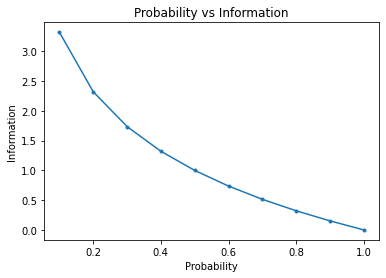

In [31]:
# compare probability vs information entropy
from math import log2
from matplotlib import pyplot
# list of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# calculate information
info = [-log2(p) for p in probs]
# plot probability vs information
pyplot.plot(probs, info, marker='.')
pyplot.title('Probability vs Information')
pyplot.xlabel('Probability')
pyplot.ylabel('Information')
pyplot.show()

We should not be surprised by two things the first of which is that the graph is not linear. It's normall because our function is log and the second is the correlation bewteen information size and the it's probability.

### Calculate the Entropy for a Random Variable

In [32]:
def entropy_base_2(probabilities):
    h = 0
    for p in probabilities:
        h += -log2(p) * p
    return h 

In [33]:
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
print('entropy: %.3f bits' % entropy_base_2(p))

entropy: 2.585 bits


Mathematically written it should look something like that 

$$H(x) = -\sum_{i = 1}^n p_i {\log_2{p_i}}$$

Now we are able to calculate the entropy of our distrubution. We would also need a function to calculate characters freqency and another function to calculate the probability of any single one.

In [34]:
import numpy as np

def calculate_frequency(data):
    freq = {}
    for c in data:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    return freq

def calculate_probability(frequencies, base_count):
    prob = []
    for f in frequencies.values():
        prob.append(f/base_count)
    return prob

def entropy(data, base):
    frequencies = calculate_frequency(data)
    probabilities = calculate_probability(frequencies, len(data))
    
    h = 0
    
    for p in probabilities:
        h += (np.log(p) / np.log(base)) * p
        
    return -h 

In [38]:
string = get_data("randomtext")
base = 2

entropy(string, base)

6.357875432066391

In [39]:
string = get_data("notthatrandomtext")
base = 2

entropy(string, base)

4.33713277375041

## How can we get back the uncompressed data from the Huffman tree?

One problem we will encounter while trying to send the compressed data is that the recivier does not have the tree to recover the data. There a couple of ways to resove this. We could agree on the coding tree in advance but for that we need to know the frequency of the letters in advance. Second option is to prefix the bit sequence with a header containing enough information to reconstruct the Huffman encoding tree. You can store that sequence at the head of the file in a human readable format. Reading this it will allow you to recreate the the tree

## Comparison with other lossless compression algorithms

We are going to use an already done comparisson. We have got the files sizes here.

<img src="imgs\datasize.png" style="width: 250px;"> 

<img src="imgs\comparison.png" style="width: 1000px;"> 

The overall behaviour of Shannon-Fano coding, Static Huffman coding and Adaptive Huffman coding isvery similar with Arithmeticcoding achieving the bestaverage compression. The reason for this is the ability of
this algorithm to keep the coding and the modelerseparate. Unlike Huffman coding, no code tree needs tobe transmitted to the receiver. Here, encoding is done to agroup of symbols, not symbol by symbol, which leads tohigher compression ratios. One more reason is its use offractional values which leads to no code waste.

## Negatives of using Huffman Coding

## Overview

## References

1. [https://en.wikipedia.org/wiki/Huffman_coding](https://en.wikipedia.org/wiki/Huffman_coding)
2. [https://www.youtube.com/watch?v=dM6us854Jk0](https://www.youtube.com/watch?v=dM6us854Jk0)
3. [https://web.stanford.edu/class/archive/cs/cs106b/cs106b.1126/handouts/220%20Huffman%20Encoding.pdf](https://web.stanford.edu/class/archive/cs/cs106b/cs106b.1126/handouts/220%20Huffman%20Encoding.pdf)
4. [http://160592857366.free.fr/joe/ebooks/ShareData/A%20Comparitive%20Study%20of%20Text%20Compression%20Algorithms.pdf](http://160592857366.free.fr/joe/ebooks/ShareData/A%20Comparitive%20Study%20of%20Text%20Compression%20Algorithms.pdf)
5. [http://home.cse.ust.hk/faculty/golin/COMP271Sp03/Notes/MyL17.pdf](http://home.cse.ust.hk/faculty/golin/COMP271Sp03/Notes/MyL17.pdf)
6. [https://www.programiz.com/dsa/huffman-coding](https://www.programiz.com/dsa/huffman-coding)
7. [https://en.wikipedia.org/wiki/Prefix_code](https://en.wikipedia.org/wiki/Prefix_code)
8. [https://www.tutorialspoint.com/huffman-codes-and-entropy-in-data-structure](https://www.tutorialspoint.com/huffman-codes-and-entropy-in-data-structure)
9. [https://machinelearningmastery.com/what-is-information-entropy/](https://machinelearningmastery.com/what-is-information-entropy/)
10. [https://en.wikipedia.org/wiki/Variable-length_code](https://en.wikipedia.org/wiki/Variable-length_code)
11. [https://leimao.github.io/blog/Huffman-Coding/](https://leimao.github.io/blog/Huffman-Coding/)
12. [https://www.princeton.edu/~cuff/ele201/kulkarni_text/information.pdf](https://www.princeton.edu/~cuff/ele201/kulkarni_text/information.pdf)